머신러닝에 사용되었던 iris 데이터를 가지고 분류 모델을 평가
  - 인공신경망(딥러닝)

In [1]:
import tensorflow as  tf
from sklearn.datasets import load_iris

In [2]:
load_iris().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
target = load_iris()['target']
data = load_iris()['data']

- 모델 설계
- 학습데이터와 검증데이터로 손실율과 정확률 시각화
- 적절한 에포크수 찾고
- 모델 저장
- 불러오고
- 만약 과적합이 발견되면 규제방법중에 Dropout도 추가
- 콜백도 사용해서 최적의 모델을 찾아서 저장

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,target)

In [5]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

In [28]:
# 모델 설계
inputs = tf.keras.Input(shape=(4,))
hidden = tf.keras.layers.Dense(100,activation='relu')(inputs)
# hidden = tf.keras.layers.Dense(10,activation='relu')(hidden)
# hidden = tf.keras.layers.Dense(5,activation='relu')(hidden)
# hidden =tf.keras.layers.Dropout(0.25) (hidden)
outputs = tf.keras.layers.Dense(3,activation='softmax')(hidden)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()


Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 4)]               0         
                                                                 
 dense_30 (Dense)            (None, 100)               500       
                                                                 
 dense_31 (Dense)            (None, 3)                 303       
                                                                 
Total params: 803
Trainable params: 803
Non-trainable params: 0
_________________________________________________________________


In [29]:
checkpoiont_cb = tf.keras.callbacks.ModelCheckpoint('iris_network.h5')
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
history = model.fit(x_train_scaled,y_train,validation_split=0.2,epochs=500, callbacks=[checkpoiont_cb,early_stopping_cb])

Epoch 1/500
3/3 [==============================] - 1s 91ms/step - loss: 1.0617 - accuracy: 0.4831 - val_loss: 0.9742 - val_accuracy: 0.6957
Epoch 2/500
3/3 [==============================] - 0s 21ms/step - loss: 0.9412 - accuracy: 0.5843 - val_loss: 0.8896 - val_accuracy: 0.6957
Epoch 3/500
3/3 [==============================] - 0s 22ms/step - loss: 0.8658 - accuracy: 0.6966 - val_loss: 0.8249 - val_accuracy: 0.7826
Epoch 4/500
3/3 [==============================] - 0s 21ms/step - loss: 0.8058 - accuracy: 0.7416 - val_loss: 0.7716 - val_accuracy: 0.7391
Epoch 5/500
3/3 [==============================] - 0s 21ms/step - loss: 0.7569 - accuracy: 0.7528 - val_loss: 0.7276 - val_accuracy: 0.7826
Epoch 6/500
3/3 [==============================] - 0s 21ms/step - loss: 0.7151 - accuracy: 0.8090 - val_loss: 0.6900 - val_accuracy: 0.7826
Epoch 7/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6766 - accuracy: 0.8315 - val_loss: 0.6550 - val_accuracy: 0.7826
Epoch 8/500
3/3 [===

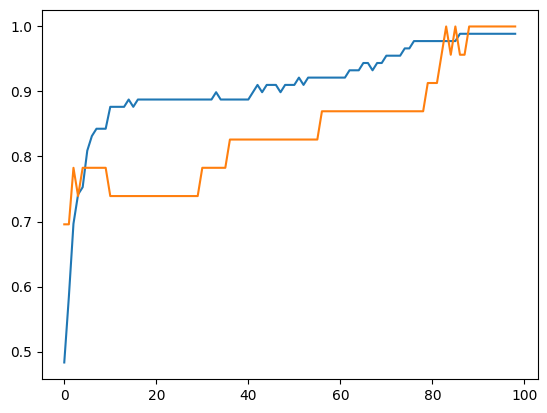

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

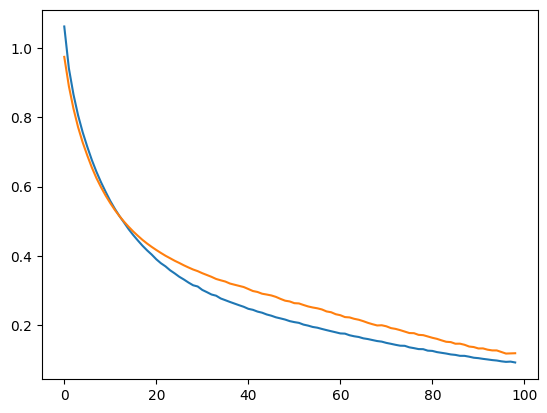

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [32]:
model.evaluate(x_test_scaled,y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.2779 - accuracy: 0.8684


[0.2778637111186981, 0.8684210777282715]

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)
lr.score(x_test_scaled,y_test)

0.8947368421052632

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])